In [1]:
!pip install -q wordcloud
!pip install -q -U  nltk.download('wordnet')
!pip install -q -U  nltk.download('vader_lexicon')
!pip install -q -U  nltk.download('punkt')
!pip install -q -U nltk.download('all')
!pip install pythainlp
import nltk
nltk.download('all')

import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore")


%matplotlib inline

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `pip install -q -U  nltk.download('wordnet')'
/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `pip install -q -U  nltk.download('vader_lexicon')'
/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `pip install -q -U  nltk.download('punkt')'
/bin/sh: -c: line 0: syntax error near unexpected token `('
/bin/sh: -c: line 0: `pip install -q -U nltk.download('all')'
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package abc is already up-to-date

[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nps_chat to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package nps_chat is already up-to-date!
[nltk_data]    | Downloading package omw to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package omw is already up-to-date!
[nltk_data]    | Downloading package opinion_lexicon to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package opinion_lexicon is already up-to-date!
[nltk_data]    | Downloading package paradigms to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package paradigms is already up-to-date!
[nltk_data]    | Downloading package pil to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package pil is already up-to-date!
[nltk_data]    | Downloading package pl196x to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package pl196x is already up-to-date

[nltk_data]    |   Package bllip_wsj_no_aux is already up-to-date!
[nltk_data]    | Downloading package word2vec_sample to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package word2vec_sample is already up-to-date!
[nltk_data]    | Downloading package panlex_swadesh to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package panlex_swadesh is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/emmayang/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up

/Users/emmayang/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [63]:
import os
import pandas as pd
import chardet

dirname = os.getcwd()
filename = 'partial_review_others.csv' #document with translated cleaned review 
data = pd.read_csv(filename, encoding='ISO-8859-1', header=0) 

print(data.shape)
data.head()

(9979, 22)


,original_No.,listing_id,id,date,reviewer_id,reviewer_name,comments,cleancomments,transcomments,Name,...,ZipCode,Latitude,Longitude,Room type,accommodates,bathrooms,bedrooms,review_scores_rating,reviews_per_month,price
0,0,2515,198,10/13/2008,2603,Jenny,Stephanie was a wonderful host! Her apartment ...,stephanie was a wonderful host! her apartment ...,stephanie was a wonderful host! her apartment ...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
1,1,2515,859,3/8/2009,8455,Roland,Such a wonderful place and very close to the m...,such a wonderful place and very close to the m...,Such a wonderful place and very close to the m...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
2,2,2515,1083,3/25/2009,9759,Cem,I just got back from a trip to NYC during whic...,i just got back from a trip to nyc during whic...,i just got back from a trip to nyc during whic...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
3,3,2515,1107,3/27/2009,9193,Holly,Stephanie's offered all the most important thi...,stephanie's offered all the most important thi...,stephanie's offered all the most important thi...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
4,4,2515,2175,5/9/2009,7048,Alessandra,"Stephanie was really nice, ftiendly and helpfu...","stephanie was really nice, ftiendly and helpfu...","stephanie was really nice, ftiendly and helpfu...",Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59


In [64]:
#Data Clean 
# remove empty entry
#data.dropna()
for i in range(len(data['transcomments'])):
    data['transcomments'][i] = " ".join(word for word in str(data['transcomments'][i]).split())

import re
#(1) comment removing numbers
#(2) comment changing to lower case
def clean(string):
    string = re.sub(r"\d", "", string) # remove numbers  
    string = re.sub(r"_+", "", string) # remove consecutive underscores
    string = string.lower() # tranform to lower case    
    
    return string.strip()

data["transcomments"] = data.transcomments.apply(clean) 
data.head()

,original_No.,listing_id,id,date,reviewer_id,reviewer_name,comments,cleancomments,transcomments,Name,...,ZipCode,Latitude,Longitude,Room type,accommodates,bathrooms,bedrooms,review_scores_rating,reviews_per_month,price
0,0,2515,198,10/13/2008,2603,Jenny,Stephanie was a wonderful host! Her apartment ...,stephanie was a wonderful host! her apartment ...,stephanie was a wonderful host! her apartment ...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
1,1,2515,859,3/8/2009,8455,Roland,Such a wonderful place and very close to the m...,such a wonderful place and very close to the m...,such a wonderful place and very close to the m...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
2,2,2515,1083,3/25/2009,9759,Cem,I just got back from a trip to NYC during whic...,i just got back from a trip to nyc during whic...,i just got back from a trip to nyc during whic...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
3,3,2515,1107,3/27/2009,9193,Holly,Stephanie's offered all the most important thi...,stephanie's offered all the most important thi...,stephanie's offered all the most important thi...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
4,4,2515,2175,5/9/2009,7048,Alessandra,"Stephanie was really nice, ftiendly and helpfu...","stephanie was really nice, ftiendly and helpfu...","stephanie was really nice, ftiendly and helpfu...",Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59


In [65]:
#! pip install 
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
import nltk
from nltk import sent_tokenize,word_tokenize 

#text = PlaintextCorpusReader("data/","Nikon_coolpix_4300.txt").raw()
striptext = data['transcomments'].replace('\n\n', ' ')
striptext = "".join(striptext.replace('\n', ' '))
sentences = sent_tokenize(striptext)
#words = word_tokenize(striptext)
#tokenize each sentence into word tokens
texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for sentence in sentences]
print(len(texts))
print(len(texts[0]))
print(len(texts[1]))

41008
2
3


In [6]:
texts

[['stephanie', 'wonderful'],
 ['apartment', 'beautiful', 'extremely'],
 ['nice'],
 ['stay',
  'city',
  'private',
  'room',
  'wonderful',
  'place',
  'close',
  'metro',
  'station'],
 ['pleasure', 'stay'],
 ['thanks', 'stephanie'],
 ['great', 'time'],
 ['s',
  'available',
  'plenty',
  'especially',
  'recommend',
  'address',
  'reasonable'],
 ['metro', 'block', 'apartment', 'central', 'convenient'],
 ['neighborhood', 'nice'],
 ['closed', 'got', 'trip', 'nyc', 'stayed'],
 ['bedroom',
  'private',
  'bathroom',
  'comes',
  'kept',
  'clean',
  'spacious',
  'unpack',
  'stuff',
  'clothes',
  'away'],
 ['live', 'rucksack', 'days', 'feel'],
 ['appartment',
  'situated',
  'right',
  'north',
  'end',
  'central',
  'park',
  'harlem',
  'close',
  'different',
  'subway'],
 ['start',
  'day',
  'morning',
  'stroll',
  'park',
  'upper',
  'west',
  'upper',
  'east',
  'catch',
  'subway',
  'south',
  'manhattan',
  'brooklyn'],
 ['geographical',
  'vantage',
  'point',
  'appar

In [11]:
dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence
#print(dictionary.token2id)
#print(dictionary.keys())
print(corpus[0])
print(texts[0])
print(corpus)

[(0, 1), (1, 1)]
['stephanie', 'wonderful']
[[(0, 1), (1, 1)], [(2, 1), (3, 1), (4, 1)], [(5, 1)], [(1, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)], [(13, 1), (14, 1)], [(0, 1), (15, 1)], [(16, 1), (17, 1)], [(18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)], [(2, 1), (8, 1), (25, 1), (26, 1), (27, 1)], [(5, 1), (28, 1)], [(29, 1), (30, 1), (31, 1), (32, 1), (33, 1)], [(10, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1)], [(44, 1), (45, 1), (46, 1), (47, 1)], [(7, 1), (26, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1)], [(53, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1)], [(48, 1), (55, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1)], [(0, 1), (45, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1)], [(5, 1), (50, 1), (59, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (8

In [9]:
#Let's split airbnb data into a training and test set
n = round(0.8*len(data))
print(n)

training = data[:n] 
test = data[n+1:len(data)-1]

training.head(10)

7983


,original_No.,listing_id,id,date,reviewer_id,reviewer_name,comments,cleancomments,transcomments,Name,...,ZipCode,Latitude,Longitude,Room type,accommodates,bathrooms,bedrooms,review_scores_rating,reviews_per_month,price
0,0,2515,198,10/13/2008,2603,Jenny,Stephanie was a wonderful host! Her apartment ...,stephanie was a wonderful host! her apartment ...,stephanie was a wonderful host! her apartment ...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
1,1,2515,859,3/8/2009,8455,Roland,Such a wonderful place and very close to the m...,such a wonderful place and very close to the m...,such a wonderful place and very close to the m...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
2,2,2515,1083,3/25/2009,9759,Cem,I just got back from a trip to NYC during whic...,i just got back from a trip to nyc during whic...,i just got back from a trip to nyc during whic...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
3,3,2515,1107,3/27/2009,9193,Holly,Stephanie's offered all the most important thi...,stephanie's offered all the most important thi...,stephanie's offered all the most important thi...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
4,4,2515,2175,5/9/2009,7048,Alessandra,"Stephanie was really nice, ftiendly and helpfu...","stephanie was really nice, ftiendly and helpfu...","stephanie was really nice, ftiendly and helpfu...",Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
5,5,2515,2889,5/20/2009,12521,Michael,I was pleasantly surprised with my whole stay ...,i was pleasantly surprised with my whole stay ...,i was pleasantly surprised with my whole stay ...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
6,6,2515,3213,5/27/2009,5889,Becca,Stephanie's apt was great. Very convenient to ...,stephanie's apt was great. very convenient to ...,stephanie's apt was great. very convenient to ...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
7,7,2515,3313,5/30/2009,15342,Sarah,my husband and i had such a great time staying...,my husband and i had such a great time staying...,my husband and i had such a great time staying...,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
8,8,2515,7144,8/10/2009,26899,Maria Luisa,"When I first arrived at Stephanie's, she was v...","when i first arrived at stephanie's, she was v...","when i first arrived at stephanie's, she was v...",Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59
9,9,2515,7350,8/13/2009,26718,Greg,awesome couldn't have been better.,awesome couldn't have been better.,awesome couldn't have been better.,Stay at Chez Chic budget room #1,...,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59


In [10]:
training['transcomments'] = training['transcomments'].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x.lower()))
training['transcomments'] = training['transcomments'].apply(lambda x: re.sub('  ', ' ', x))
training['transcomments'][0:5]

/Users/emmayang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/emmayang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    stephanie was a wonderful host her apartment w...
1    such a wonderful place and very close to the m...
2    i just got back from a trip to nyc during whic...
3    stephanie's offered all the most important thi...
4    stephanie was really nice ftiendly and helpful...
Name: transcomments, dtype: object

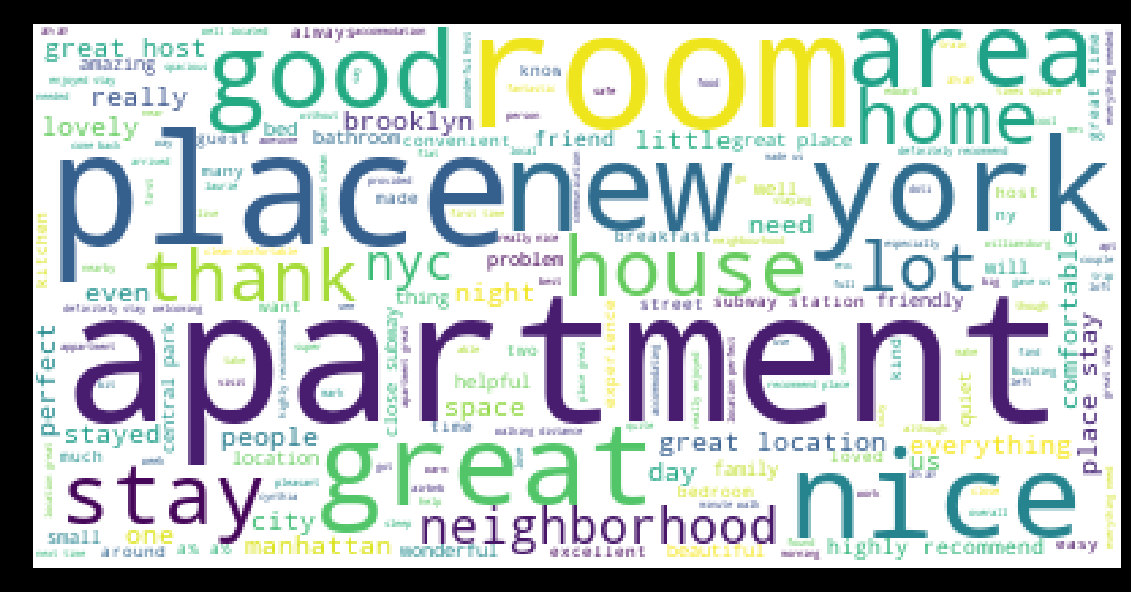

In [13]:

def wordcloud(data,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in data[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(" ")
    
    
wordcloud(data,'transcomments')  

In [14]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet


In [15]:
#Tokenize, Normalize, and Stem the data
def tokenize(data, text):
  from nltk.tokenize import RegexpTokenizer
  preprocessed = [" ".join(RegexpTokenizer(r'\w+').\
                           tokenize(text[idx])) \
                  for idx in data.index]
  return preprocessed
  
preprocessed = tokenize(data, data.transcomments)

preprocessed[0:3]

['stephanie was a wonderful host her apartment was beautiful and extremely clean we had a very nice and affordable stay in the city with private room and own bathroom',
 'such a wonderful place and very close to the metro station on the line it was a pleasure to stay in she s french so last word thanks again stephanie for your hospitality we had a great time with you very â s available for us with plenty of advice i would especially recommend this address which is more for a reasonable price the metro is just a block from the apartment and the line is the most central and convenient nyc his neighborhood is really nice too go there closed eyes',
 'i just got back from a trip to nyc during which i stayed at stephanie s appartment the bedroom and private bathroom that comes with it were both kept very clean and are spacious so that i could unpack my stuff and put my clothes away in the closet i didn t have to live out of my rucksack for ten days which made me already feel comfortable the 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word', min_df = 0, stop_words = 'english')

In [17]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

import pandas as pd
from nltk.corpus import movie_reviews

from collections import defaultdict
import csv

from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',  min_df = 0, stop_words = 'english')

tfidf_matrix =  tf.fit_transform(preprocessed)
feature_names = tf.get_feature_names() 


len(feature_names)
feature_names[20:40]


['abend',
 'abide',
 'ability',
 'abimã',
 'able',
 'ables',
 'abode',
 'abodes',
 'abolut',
 'aboudlaye',
 'abound',
 'aboutwe',
 'abraã',
 'abreisetag',
 'abrir',
 'abris',
 'abroad',
 'abruptly',
 'abs',
 'absence']

In [139]:
 tfidf_matrix

<2660x6978 sparse matrix of type '<class 'numpy.float64'>'
	with 73682 stored elements in Compressed Sparse Row format>

In [18]:
dense = tfidf_matrix.todense()
episode = dense[0].tolist()[0]
phrase_scores = [pair for pair in zip(range(0, len(episode)), episode) if pair[1] > 0]
len(phrase_scores)

14

In [19]:
sorted(phrase_scores, key=lambda t: t[1] * -1)[:5]

[(302, 0.42390933916271983),
 (12495, 0.39822982599653095),
 (10207, 0.3358223226724739),
 (4866, 0.32966060322912855),
 (1289, 0.273551215555797)]

In [20]:
feature_names[969]

'attentiive'

In [21]:
sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))
#importance of the word
#TF frequency of a word, IDF log_e(Total number of documents / Number of documents with term t in it)

affordable           0.42390933916271983
stephanie            0.39822982599653095
private              0.3358223226724739
extremely            0.32966060322912855
beautiful            0.273551215555797
bathroom             0.2573565959281743
wonderful            0.2504635576607759
city                 0.2495700466839653
room                 0.18760597890121303
nice                 0.18473538178012952
clean                0.17553194870480024
host                 0.17408666422070504
apartment            0.15237900431085277
stay                 0.14325183413085155


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text 

custom_stop_words = []
all_stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop_words)

vectorizer = TfidfVectorizer(min_df = 1, ngram_range = (1,1), 
                             stop_words = all_stop_words)

tfidf = vectorizer.fit_transform(preprocessed)
print("Document-term matrix of size {} x {}".format(*tfidf.shape[:2]))

Document-term matrix of size 9979 x 14877


In [23]:
#Generate NMF
from sklearn import decomposition
import numpy as np

nmf = decomposition.NMF(init = 'nndsvd', n_components = 4, max_iter = 200)
W = nmf.fit_transform(tfidf)
H = nmf.components_
print("Factor W of size {} and factor H of size {}".format(W.shape, H.shape))

feature_names = vectorizer.get_feature_names()
n_top_words = 20

#%% print top words in each topic
for topic_idx, topic in enumerate(H):
    print("Topic #{}:".format(topic_idx))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()
    
    

Factor W of size (9979, 4) and factor H of size (4, 14877)
Topic #0:
apartment stay room comfortable subway clean time home new close recommend perfect just york manhattan neighborhood restaurants easy really wonderful

Topic #1:
canceled reservation automated posting arrival days host day departure spent cancelled late accommodating flexible stayed reason spend mark excellent times

Topic #2:
great location host place stay definitely perfect ben helpful space thanks friendly experience value accommodating recommend excellent clean hosts easy

Topic #3:
nice good place really location room clean stay host people guy flat edward close price subway helpful andrea quiet near



# Sentiment Analysis

In [25]:

positive_vocab = [] #[ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [] #[ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = ['movie','the','sound','was','is','actors','did','know','words','not' ]

with open("positive.txt", "r") as p_file:
    for line in p_file:
        positive_vocab.append(line)

with open("negative.txt", "r") as n_file:
    for line in n_file:
        negative_vocab.append(line)

def word_feats(words):
    return dict([(word, True) for word in words])


positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab] 

In [33]:
import requests
import json
import pandas as pd
from pythainlp.tokenize import word_tokenize

import json
import nltk

data['lemText'] = ''
data['lemText'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in data['transcomments']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)

X = vectorizer.fit_transform(data['lemText'].str.upper())

sid = SentimentIntensityAnalyzer()
data['sentiment_compound_polarity']=data.lemText.apply(lambda x:sid.polarity_scores(x)['compound'])
data['sentiment_neutral']=data.lemText.apply(lambda x:sid.polarity_scores(x)['neu'])
data['sentiment_negative']=data.lemText.apply(lambda x:sid.polarity_scores(x)['neg'])
data['sentiment_positive']=data.lemText.apply(lambda x:sid.polarity_scores(x)['pos'])


data['sentiment_type']=''

data.loc[data.sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
data.loc[data.sentiment_compound_polarity =0,'sentiment_type']='NEUTRAL'
data.loc[data.sentiment_compound_polarity<=0,'sentiment_type']='NEGATIVE'

data.to_csv("Sentiment_Reviews.csv")



In [27]:
data[data['sentiment_type'] == 'NEGATIVE']

,original_No.,listing_id,id,date,reviewer_id,reviewer_name,comments,cleancomments,transcomments,Name,...,bedrooms,review_scores_rating,reviews_per_month,price,lemText,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_positive,sentiment_type
26,27,2515,77637,8/13/2010,183527,Yutaro,The host cancelled my reservation,the host cancelled my reservation,the host cancelled my reservation,Stay at Chez Chic budget room #1,...,1,93,1.42,59,the host cancelled my reservation,-0.2500,0.667,0.333,0.000,NEGATIVE
45,46,2515,281146,5/25/2011,579207,Lucia,I WILL BE BACK IN THIS ROOM,i will be back in this room,i will be back in this room,Stay at Chez Chic budget room #1,...,1,93,1.42,59,i will be back in this room,0.0000,1.000,0.000,0.000,NEGATIVE
47,48,2515,318524,6/16/2011,658046,Sara,The host canceled my reservation 19 days befor...,the host canceled my reservation days before ...,the host canceled my reservation days before a...,Stay at Chez Chic budget room #1,...,1,93,1.42,59,the host canceled my reservation days before a...,0.0000,1.000,0.000,0.000,NEGATIVE
56,57,2515,760569,12/3/2011,1358563,Katherine,Stephanie made us feel right at home! The week...,stephanie made us feel right at home! the week...,stephanie made us feel right at home the week ...,Stay at Chez Chic budget room #1,...,1,93,1.42,59,stephanie made us feel right at home the week ...,-0.3612,0.841,0.099,0.060,NEGATIVE
66,67,2515,1587735,6/29/2012,2077022,Alex,ÃÂ¡ÃÂÃÂµÃÂÃÂ°ÃÂ½ÃÂ¸ - ÃÂ ÃÂ¾ÃÂÃÂ...,Ã°Â¡Ã±ÂÃ°ÂµÃ±ÂÃ°Â°Ã°Â½Ã°Â¸ - Ã±Â Ã°Â¾Ã±ÂÃ°Â...,ã the ãd î ãã° â° the â½ of â¸-ãã° â¾ ã±d...,Stay at Chez Chic budget room #1,...,1,93,1.42,59,the d the of d ...,0.0000,1.000,0.000,0.000,NEGATIVE
79,80,2515,5613012,7/8/2013,6837286,Arjun,It was a decent location. People who want to v...,it was a decent location. people who want to v...,it was a decent location people who want to vi...,Stay at Chez Chic budget room #1,...,1,93,1.42,59,it was a decent location people who want to vi...,-0.2280,0.808,0.102,0.089,NEGATIVE
99,100,2515,15899473,7/17/2014,15394739,VinÃÂ­cius,The reservation was canceled the day before ar...,the reservation was canceled the day before ar...,the reservation was canceled the day before ar...,Stay at Chez Chic budget room #1,...,1,93,1.42,59,the reservation was canceled the day before ar...,0.0000,1.000,0.000,0.000,NEGATIVE
115,116,2515,39764765,7/26/2015,34224385,Lai,Ã¦ÂÂºÃ¤Â¸ÂÃ©ÂÂÃ§ÂÂ.,Ã¦ÂÂºÃ¤Â¸ÂÃ©ÂÂÃ§ÂÂ.,ã âº ã¤ â¸ ã©ã§,Stay at Chez Chic budget room #1,...,1,93,1.42,59,,0.0000,0.000,0.000,0.000,NEGATIVE
117,118,2515,43811185,8/22/2015,4717007,Filip,The host canceled this reservation 14 days bef...,the host canceled this reservation days befor...,the host canceled this reservation days before...,Stay at Chez Chic budget room #1,...,1,93,1.42,59,the host canceled this reservation days before...,0.0000,1.000,0.000,0.000,NEGATIVE
125,126,2515,62596870,2/15/2016,55679553,Gwonil,96Ã«Â ÂÃ¬ÂÂ Ã«ÂªÂÃ«ÂÂ¬ Ã¬Â§ÂÃ«ÂÂÃ«ÂÂ...,Ã«Â ÂÃ¬ÂÂ Ã«ÂªÂÃ«ÂÂ¬ Ã¬Â§ÂÃ«ÂÂÃ«ÂÂ Ã...,and the â¼ are not â´ and î ãã« â¨ what is t...,Stay at Chez Chic budget room #1,...,1,93,1.42,59,and the are not and what is t...,0.0000,1.000,0.000,0.000,NEGATIVE


In [54]:
data.describe()


,listing_id,ZipCode,Latitude,Longitude,accommodates,bathrooms,bedrooms,review_scores_rating,reviews_per_month,price,sentiment_compound_polarity,description_sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_positive
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,13223.229508,10692.204918,40.723288,-73.963528,2.729508,1.110656,1.122951,92.245902,0.916557,133.098361,0.846019,0.858907,0.805869,0.030172,0.155795
std,5512.520950,604.205495,0.049015,0.028957,1.710623,0.528182,0.675154,6.300087,0.910579,117.460414,0.082449,0.283547,0.101819,0.027542,0.068681
min,2515.000000,10002.000000,40.634708,-74.011209,1.000000,0.000000,0.000000,60.000000,0.040000,35.000000,0.562992,-0.411800,0.000000,0.000000,0.000000
25%,8138.750000,10020.000000,40.684331,-73.983265,2.000000,1.000000,1.000000,90.000000,0.240000,70.000000,0.802645,0.910900,0.770000,0.011000,0.110500
50%,14047.500000,11205.500000,40.713726,-73.964325,2.000000,1.000000,1.000000,93.500000,0.640000,107.500000,0.866298,0.961100,0.830500,0.023000,0.150500
75%,17298.750000,11221.000000,40.747472,-73.948774,3.000000,1.000000,1.000000,97.000000,1.357500,149.750000,0.904822,0.982200,0.863000,0.045000,0.197500
max,23135.000000,11434.000000,40.864817,-73.765764,12.000000,3.500000,4.000000,100.000000,4.560000,1000.000000,0.976965,0.998700,0.963000,0.159000,0.500000


In [ ]:
! pip install 
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint

text = #PlaintextCorpusReader("data/","Nikon_coolpix_4300.txt").raw()
striptext = text.replace('\n\n', ' ')
striptext = striptext.replace('\n', ' ')
sentences = sent_tokenize(striptext)
#words = word_tokenize(striptext)
#tokenize each sentence into word tokens
texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for sentence in sentences]
len(texts)

In [ ]:
airbnb_sentiment = data.groupby(['sentiment_type'])['sentiment_neutral'].count()
airbnb_sentiment.rename("",inplace=True)

explode = (1, 0, 0)

plt.subplot(221)
airbnb_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})


plt.subplot(222)
airbnb_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})


plt.show()
#graph on distribution of postive and negative review 

In [34]:
import os
import pandas as pd
import chardet

#for description 
dirname = os.getcwd()
filename = 'Sentiment_Reviews_Agg.csv'
data = pd.read_csv(filename, encoding='ISO-8859-1', header=0) 

print(data.shape)
for i in range(len(data['Description'])):
    data['Description'][i] = " ".join(word for word in str(data['Description'][i]).split())

import re
#(1) comment removing numbers
#(2) comment changing to lower case
def clean(string):
    string = re.sub(r"\d", "", string) # remove numbers  
    string = re.sub(r"_+", "", string) # remove consecutive underscores
    string = string.lower() # tranform to lower case    
    
    return string.strip()

data["Description"] = data.Description.apply(clean) 
data.head()

(122, 15)


,listing_id,Name,Description,Neighborhood,ZipCode,Latitude,Longitude,Room type,accommodates,bathrooms,bedrooms,review_scores_rating,reviews_per_month,price,sentiment_compound_polarity
0,2515,Stay at Chez Chic budget room #1,step into our artistic spacious apartment and ...,Harlem,10026,40.799205,-73.953676,Private room,3,1.0,1,93,1.42,59,0.802856
1,2539,Clean & quiet apt home by the park,renovated apt home in elevator building. spaci...,Kensington,11218,40.647486,-73.972370,Private room,4,1.0,1,98,0.23,149,0.685763
2,2595,Skylit Midtown Castle,"find your romantic getaway to this beautiful, ...",Midtown,10018,40.753621,-73.983774,Entire home/apt,2,1.0,0,94,0.33,225,0.837542
3,3330,++ Brooklyn Penthouse Guestroom ++,"this is a spacious, clean, furnished master be...",Williamsburg,11206,40.708558,-73.942362,Private room,2,1.0,1,97,0.32,70,0.875103
4,3831,Cozy Entire Floor of Brownstone,urban retreat: enjoy s.f. floor in brownston...,Clinton Hill,11238,40.685138,-73.959757,Entire home/apt,3,1.0,1,91,4.36,89,0.838367


In [35]:
#Tokenize, Normalize, and Stem the data
def tokenize(data, text):
  from nltk.tokenize import RegexpTokenizer
  preprocessed = [" ".join(RegexpTokenizer(r'\w+').\
                           tokenize(text[idx])) \
                  for idx in data.index]
  return preprocessed
  
preprocessed = tokenize(data, data.Description)

preprocessed[0:3]

['step into our artistic spacious apartment and enjoy your artistic guest room with original artwork from ny artists shared with my little family however we often out and you won t see us much across the street from central park the busy city minutes away but sleeping in quiet at night please book directly no need to send a request for dates calendar is up to date all airbnb reservations will be honored nice comfortable and clean private guest room with shared bathroom people max full size bed in very nice apartment on central park north th floor walk up same place as chez chic max capacity of the rooms people you will share the apt with me and my little family daily cleaning in common areas located one block from subway b c on th street bus m at the corner central park across the street your room full size bed sleeps two desk digital tv dvd wifi internet a c closet and desk sheets towels provided iron air dryer provided separate f',
 'renovated apt home in elevator building spacious r

In [36]:
positive_vocab = [] #[ 'awesome', 'outstanding', 'fantastic', 'terrific', 'good', 'nice', 'great', ':)' ]
negative_vocab = [] #[ 'bad', 'terrible','useless', 'hate', ':(' ]
neutral_vocab = ['movie','the','sound','was','is','actors','did','know','words','not' ]

with open("positive.txt", "r") as p_file:
    for line in p_file:
        positive_vocab.append(line)

with open("negative.txt", "r") as n_file:
    for line in n_file:
        negative_vocab.append(line)

def word_feats(words):
    return dict([(word, True) for word in words])


positive_features = [(word_feats(pos), 'pos') for pos in positive_vocab]
negative_features = [(word_feats(neg), 'neg') for neg in negative_vocab]
neutral_features = [(word_feats(neu), 'neu') for neu in neutral_vocab] 

In [40]:
import requests
import json
import pandas as pd
from pythainlp.tokenize import word_tokenize

import json
import nltk

data['lemText'] = ''
data['lemText'] = [''.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line)) for line in lists]).strip() for lists in data['Description']]       
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)

X = vectorizer.fit_transform(data['lemText'].str.upper())

sid = SentimentIntensityAnalyzer()
data['description_sentiment_compound_polarity']=data.lemText.apply(lambda x:sid.polarity_scores(x)['compound'])
data['sentiment_neutral']=data.lemText.apply(lambda x:sid.polarity_scores(x)['neu'])
data['sentiment_negative']=data.lemText.apply(lambda x:sid.polarity_scores(x)['neg'])
data['sentiment_positive']=data.lemText.apply(lambda x:sid.polarity_scores(x)['pos'])


data['sentiment_type']=''

data.loc[data.description_sentiment_compound_polarity>0,'sentiment_type']='POSITIVE'
data.loc[data.description_sentiment_compound_polarity<=0,'sentiment_type']='NEGATIVE'

data.head()

data.to_csv("Sentiment_Reviews_Description_Agg.csv")

In [ ]:
airbnb_sentiment = data.groupby(['sentiment_type'])['sentiment_neutral'].count()
airbnb_sentiment.rename("",inplace=True)

explode = (1, 0, 0)

plt.subplot(221)
airbnb_sentiment.transpose().plot(kind='barh',figsize=(20, 20))
plt.title('Sentiment Analysis 1', bbox={'facecolor':'0.8', 'pad':0})


plt.subplot(222)
airbnb_sentiment.plot(kind='pie',figsize=(20, 20),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=3, borderaxespad=0.)
plt.title('Sentiment Analysis 2', bbox={'facecolor':'0.8', 'pad':0})


plt.show()

# Topic modeling
The goal of topic modeling is to identify the major concepts underlying airbnb review for each host and description provided by each host. Topic modeling uses "Unsupervised Learning".  

# <h3>LDA: Latent Dirichlet Allocation Model</h3>
<li>Identifies potential topics using pruning techniques like 'upward closure'
<li>Computes conditional probabilities for topic word sets in Host description 
<li>Identifies the most likely topics
<li>Does this over multiple passes probabilistically picking topics in each pass

In [48]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

#Tokenize, Normalize, and Stem the data
def tokenize(data, text):
  from nltk.tokenize import RegexpTokenizer
  preprocessed = [" ".join(RegexpTokenizer(r'\w+').\
                           tokenize(text[idx])) \
                  for idx in data.index]
  return preprocessed
  
preprocessed = tokenize(data, data.lemText)

sorted_phrase_scores = sorted(phrase_scores, key=lambda t: t[1] * -1)
for phrase, score in [(feature_names[word_id], score) for (word_id, score) in sorted_phrase_scores][:20]:
   print('{0: <20} {1}'.format(phrase, score))

affordable           0.42390933916271983
stephanie            0.39822982599653095
private              0.3358223226724739
extremely            0.32966060322912855
beautiful            0.273551215555797
bathroom             0.2573565959281743
wonderful            0.2504635576607759
city                 0.2495700466839653
room                 0.18760597890121303
nice                 0.18473538178012952
clean                0.17553194870480024
host                 0.17408666422070504
apartment            0.15237900431085277
stay                 0.14325183413085155


# Parameters:
Number of topics: The number of topics you want generated. The larger the document, the more the desirable topics
Passes: The LDA model makes through the document. More passes, slower analysis

In [ ]:
#Set parameters
#corpus on from the top section 
num_topics = 5 #The number of topics that should be generated
passes = 5
lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)

In [ ]:
#! pip install 
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.parsing.preprocessing import STOPWORDS
import pprint
import nltk
from nltk import sent_tokenize,word_tokenize 


data["LDA_topic"] = ""
for i in range(len(data['transcomments'])):
    striptext = data['transcomments'][i].replace('\n\n', ' ')
    #print(data['transcomments'][i])
    striptext = "".join(striptext.replace('\n', ' '))
    sentences = sent_tokenize(striptext)
    #tokenize each sentence into word tokens
    texts = [[word for word in sentence.lower().split()
        if word not in STOPWORDS and word.isalnum()]
        for sentence in sentences]
    dictionary = corpora.Dictionary(texts) #(word_id,frequency) pairs
    corpus = [dictionary.doc2bow(text) for text in texts] #(word_id,freq) pairs by sentence

    #Set parameters
    num_topics = 5 #The number of topics that should be generated
    passes = 5
    if len(corpus[0]) > 0:
        lda = LdaModel(corpus,
              id2word=dictionary,
              num_topics=num_topics,
              passes=passes)
        result =""
        for j in range(passes):
            result += str(lda.print_topics(num_words=num_topics)[j][1])
    
        data["LDA_topic"][i]= " ".join(result) 

data.to_csv("LDA.csv")
#then do some aggregation on the total for the LDA topics conditional probabalities score 

In [1]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

data_url = 'topic_LDA.csv' #airbnb 
data = pd.read_csv(data_url, encoding='ISO-8859-1', index_col=0,)
data.head()

,Topic,LDA,Total,host_id
listing_id,,,,
0,stephanie,0.300,7.146,2515
1,especially,0.092,0.092,2515
2,end,0.044,0.044,2515
3,home,0.048,0.480,2515
4,ftiendly,0.167,0.915,2515


In [2]:
import csv
Dict={}
Result ={}
for i in range(len(data.host_id)):
    if data.host_id[i] in Dict:
        if str(data.Topic[i]) not in Dict[data.host_id[i]]:
            Dict[data.host_id[i]][str(data.Topic[i])] = data.Total[i]
                    
    else:  
        Top_10 = {}
        Top_10[str(data.Topic[i])] =data.Total[i]
        Dict[data.host_id[i]] = Top_10
        Result[data.host_id[i]] = []
    
print(Dict)

{2515: {'stephanie': 7.146, 'especially': 0.092, 'end': 0.044000000000000004, 'home': 0.48, 'ftiendly': 0.915, 'surprised': 0.187, 'apt': 0.619, 'chez': 0.8220000000000001, 'apartment': 1.626, 'awesome': 5.0, 'gave': 0.262, 'host': 2.108, 'help': 0.12, 'venues': 0.040999999999999995, 'distance': 0.091, 'thanks': 1.86, 'excellent': 1.335, 'nights': 0.5479999999999999, 'boyfriend': 0.066, 'wish': 0.055999999999999994, 'service': 0.065, 'baby': 0.182, 'cancelled': 1.665, 'felt': 0.542, 'tips': 0.774, 'family': 3.0989999999999998, 'welcoming': 1.405, 'better': 0.125, 'come': 0.47, 'nice': 2.221, 'staying': 0.6709999999999999, 'shared': 0.115, 'close': 0.875, 'little': 0.423, 'bussle': 0.035, 'central': 0.564, 'nan': 0.0, 'good': 0.462, 'wonderful': 3.1310000000000002, 'reasonable': 0.161, 'strolling': 0.044000000000000004, 'finding': 0.048, 'pleasantly': 0.337, 'block': 0.478, 'subway': 0.909, 'friendly': 0.6829999999999999, 'great': 3.7289999999999996, 'willing': 0.12, 'food': 0.04, 'clea

In [3]:
Final_Dict ={}
Top_word_num =10
for key1, value in Dict.items():
    sort_dict = sorted(Dict[key1] ,key = lambda x: Dict[key1][x], reverse = True)
    Final_list = []
    s =0
    for k in sort_dict:
        if s < Top_word_num:
            #Final_list.append("{} : {}".format(k, Dict[key1][k]))
            Final_list.append(k)
            s+=1
    Final_Dict[key1] = Final_list
print(Final_Dict)

{2515: ['stephanie', 'awesome', 'great', 'wonderful', 'family', 'time', 'place', 'nice', 'host', 'stay'], 17240: ['thank', 'place', 'great', 'area', 'slavek', 'enjoyed', 'stay', 'manuel', 'hosts', 'recomend'], 17297: ['great', 'place', 'ok', 'nice', 'nicolas', 'apartment', 'clean', 'good', 'reliable', 'precise'], 17298: ['great', 'good', 'nice', 'stay', 'big', 'recommend', 'apartment', 'place', 'felt', 'thank'], 17299: ['chris', 'place', 'apartment', 'great', 'close', 'automated', 'nice', 'nicolas', 'days', 'brooklyn'], 17693: ['great', 'place', 'tye', 'etienne', '\x92¢Î_', 'stay', 'good', 'locks', 'close', 'kind'], 17747: ['george', 'great', 'stay', 'place', 'room', 'apartment', 'clean', 'definitely', 'nice', 'location'], 18127: ['josh', 'place', 'apartment', 'stay', 'great', 'east', 'perfect', 'flat', 'like', 'thank'], 18195: ['justin', 'apartment', 'great', 'room', 'quiet', 'stay', 'ildiko', 'thank', 'place', 'kitchen'], 18198: ['great', 'justin', 'thanks', 'new', 'friendly', 'ildik

In [5]:
with open('topic_rank.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in Final_Dict.items():
        writer.writerow([key, value])  